<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [2]:
# !wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [3]:
# !pip install pandas 
# !pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [4]:
# Read the CSV file
df = pd.read_csv('survey_data_1.csv')

# Display the first few rows of the data
df.head()


ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [5]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [6]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [7]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


COUNT(*)
0     65437

## Demo: Listing All Tables


To view the names of all tables in the database:


In [8]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


Table_Name
0       main

## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568

## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [10]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [11]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get column info
QUERY = "PRAGMA table_info(main)"
columns_info = pd.read_sql_query(QUERY, conn)

# Display column names
print(columns_info[['name']])

# Close the connection
conn.close()

                    name
0             ResponseId
1             MainBranch
2                    Age
3             Employment
4             RemoteWork
..                   ...
109      JobSatPoints_11
110         SurveyLength
111           SurveyEase
112  ConvertedCompYearly
113               JobSat

[114 rows x 1 columns]


In [12]:

import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Get all column names
QUERY = "PRAGMA table_info(main)"
columns_info = pd.read_sql_query(QUERY, conn)

# Filter columns that contain 'comp' (case-insensitive)
comp_columns = columns_info[columns_info['name'].str.contains('comp', case=False)]

# Display matching column names
print(comp_columns[['name']])

# Close the connection
conn.close()



                    name
21             CompTotal
67             AIComplex
112  ConvertedCompYearly


In [13]:
## Write your code here

# Reconnect and write the DataFrame
conn = sqlite3.connect('survey-data.sqlite')

<Axes: ylabel='Frequency'>

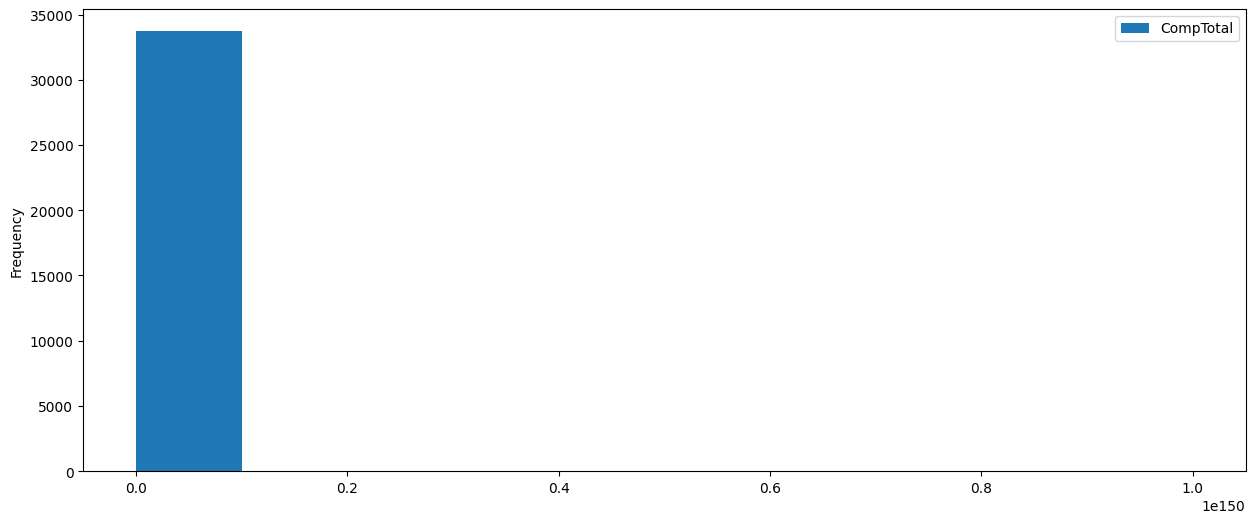

In [14]:
q1 = """ SELECT CompTotal FROM main """

df = pd.read_sql_query(q1, conn)
df.plot(kind='hist', figsize=(15,6))

**Box Plots**

Plot a box plot of Age.


<Axes: >

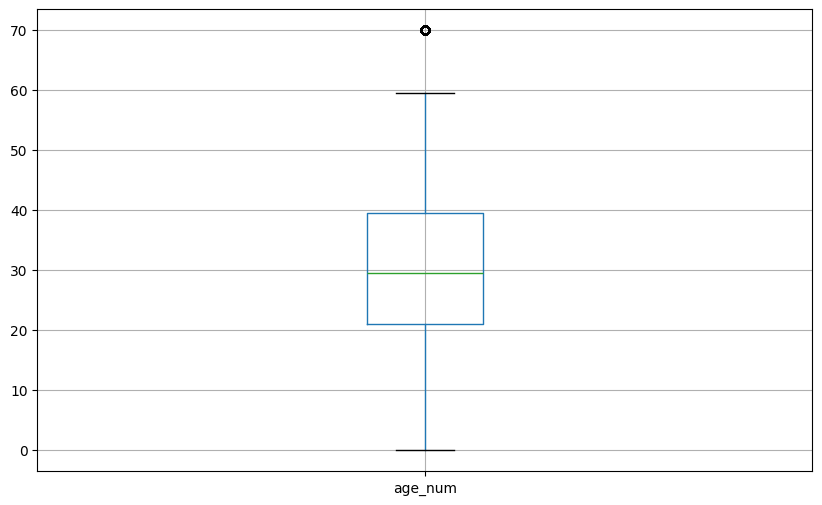

In [15]:
## Write your code here

q2 = """ SELECT Age FROM main """
df_age = pd.read_sql_query(q2, conn)

# since age column doesnot have numeric data
age_map = {'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': 0}
df_age['age_num'] = df_age['Age'].map(age_map)

df_age.boxplot(column='age_num', figsize=(10, 6))
# plt.title('')
# plt.xlabel('')

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


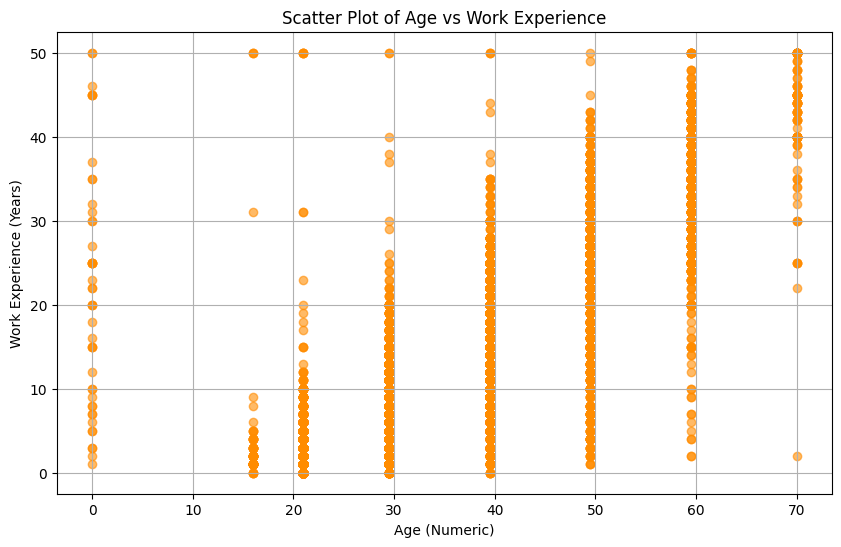

In [16]:
## Write your code here
q3 = """ SELECT Age, WorkExp FROM main
"""

df_age_exp = pd.read_sql_query(q3, conn)

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': 0
}

df_age_exp['age_num'] = df_age_exp['Age'].map(age_map)

# Clean WorkExp
df_age_exp = df_age_exp.dropna(subset=['age_num', 'WorkExp'])
df_age_exp = df_age_exp[df_age_exp['WorkExp'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
df_age_exp['WorkExp'] = df_age_exp['WorkExp'].astype(float)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(df_age_exp['age_num'], df_age_exp['WorkExp'], alpha=0.6, color='darkorange')
plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Age (Numeric)')
plt.ylabel('Work Experience (Years)')
plt.grid(True)
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


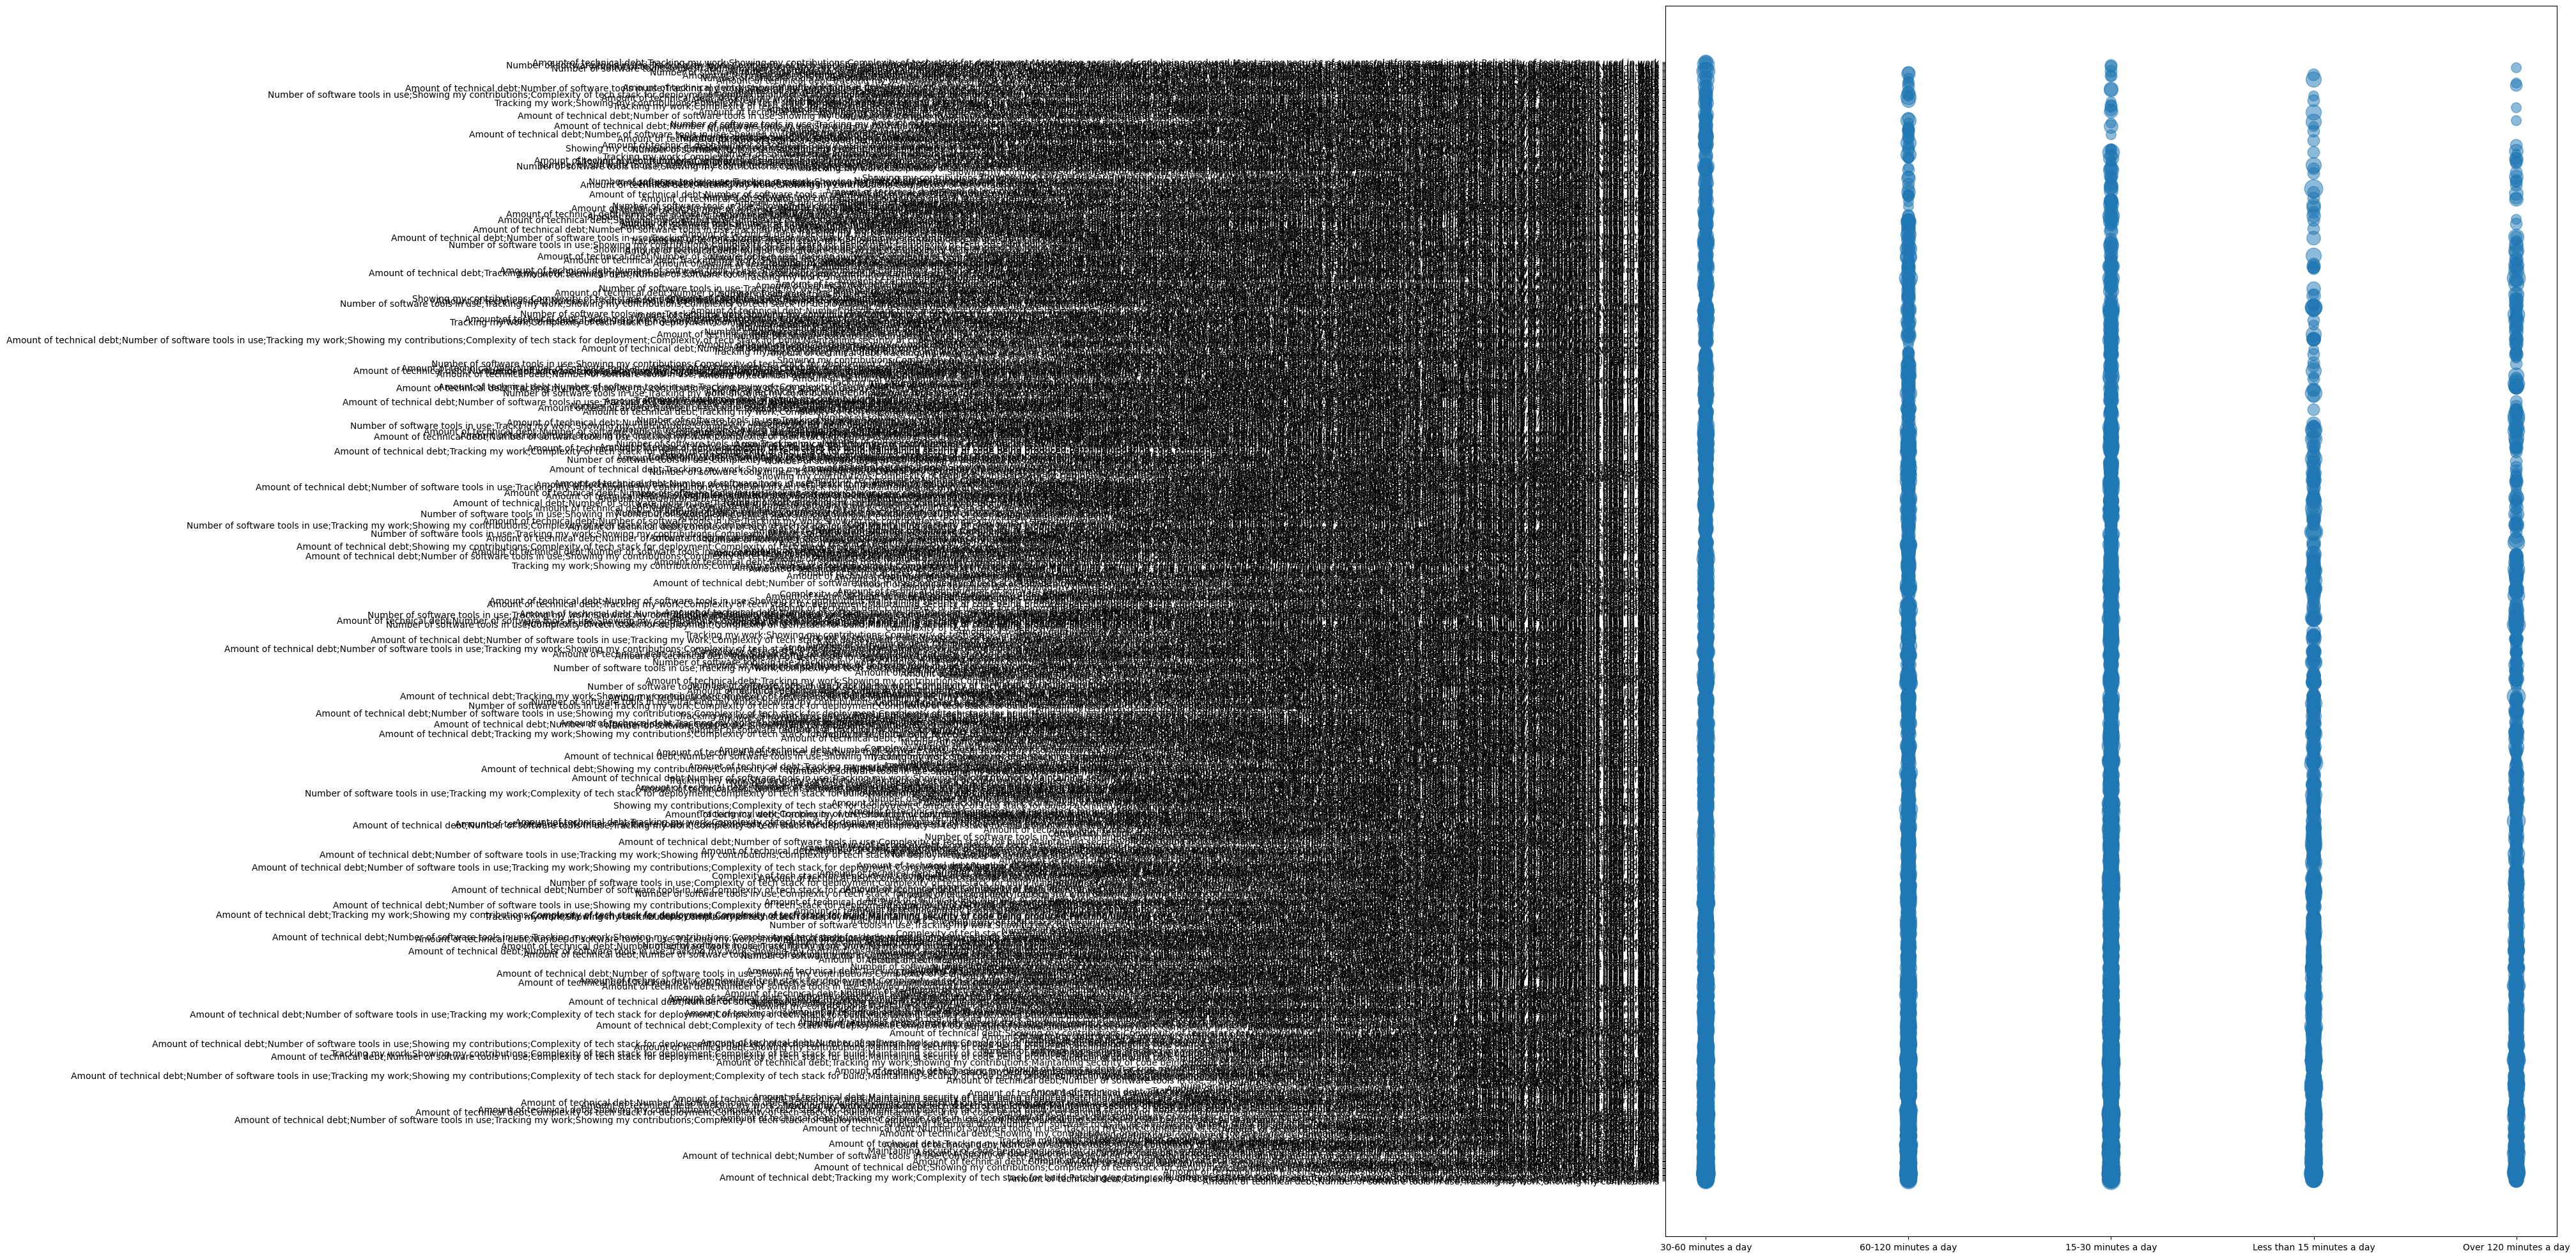

In [17]:
## Write your code here
q4 = """ SELECT TimeSearching, Frustration, Age FROM main
"""

df_bubble = pd.read_sql_query(q4, conn)

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': 0
}

df_bubble['age_num'] = df_bubble['Age'].map(age_map)

# dropping missing data
df_bubble = df_bubble.dropna(subset = ['TimeSearching', 'Frustration', 'age_num'])
# dropping (excluding : 'prefer not to say' in age)
df_bubble = df_bubble[df_bubble['age_num']>0]

# Plot
plt.figure(figsize=(18, 25))
plt.scatter(df_bubble['TimeSearching'], df_bubble['Frustration'], s = df_bubble['age_num']*6, alpha=0.5)

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [18]:
## Write your code here
Query5 = """
SELECT DatabaseWantToWorkWith as Database, count(*) as No_of_respondents
FROM main
GROUP BY DatabaseWantToWorkWith
ORDER BY No_of_respondents DESC LIMIT 5"""

db_df = pd.read_sql_query(Query5, conn)
db_df = db_df.dropna()
print(db_df)


               Database  No_of_respondents
1            PostgreSQL               3738
2     PostgreSQL;SQLite               1533
3                SQLite               1476
4  Microsoft SQL Server               1431


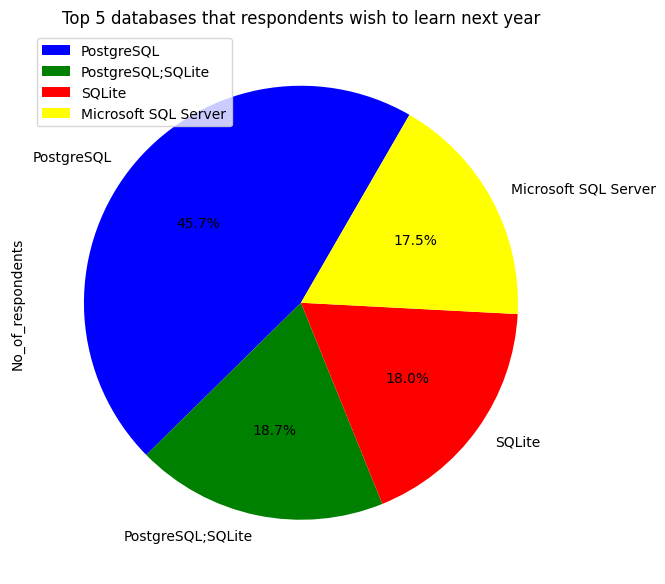

In [19]:
db_df.plot(kind = 'pie', labels = db_df['Database'], y = 'No_of_respondents',
figsize = (7,10), #dimension of the chart window
autopct='%1.1f%%', #autopct displays percentages in pie chart. so .1f% rounds to 1 decimal place.
colors = ['blue', 'green', 'red', 'yellow', 'pink'], #colours of the pie chart items
startangle = 60) #start Angle implies that we can rotate the pie chart according to the degree angle we specify  
plt.title('Top 5 databases that respondents wish to learn next year')

plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [20]:
## Write your code here
q6 = """ SELECT TimeSearching, TimeAnswering, Age FROM main WHERE Age = '35-44 years old'
"""
df_tsta = pd.read_sql_query(q6, conn)
# df_tsta.groupby('Age')[['TimeSearching', 'TimeAnsering']].median()
df_tsta.head()

TimeSearching         TimeAnswering              Age
0                 None                  None  35-44 years old
1                 None                  None  35-44 years old
2                 None                  None  35-44 years old
3  30-60 minutes a day  60-120 minutes a day  35-44 years old
4  30-60 minutes a day   15-30 minutes a day  35-44 years old

In [21]:
df_tsta['TimeAnswering'].unique()

array([None, '60-120 minutes a day', '15-30 minutes a day',
       'Less than 15 minutes a day', '30-60 minutes a day',
       'Over 120 minutes a day'], dtype=object)

In [22]:
df_tsta['TimeSearching'].unique()

array([None, '30-60 minutes a day', '15-30 minutes a day',
       '60-120 minutes a day', 'Less than 15 minutes a day',
       'Over 120 minutes a day'], dtype=object)

In [23]:
# we need to map these to numerical values
time_map = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150,  # or higher if you prefer
    None: None
}
df_tsta['TimeSearching'] = df_tsta['TimeSearching'].map(time_map)
df_tsta['TimeAnswering'] = df_tsta['TimeAnswering'].map(time_map)

df_tsta.groupby('Age')[['TimeSearching', 'TimeAnswering']].median().reset_index()

df_tsta.head()

TimeSearching  TimeAnswering              Age
0            NaN            NaN  35-44 years old
1            NaN            NaN  35-44 years old
2            NaN            NaN  35-44 years old
3           45.0           90.0  35-44 years old
4           45.0           22.5  35-44 years old

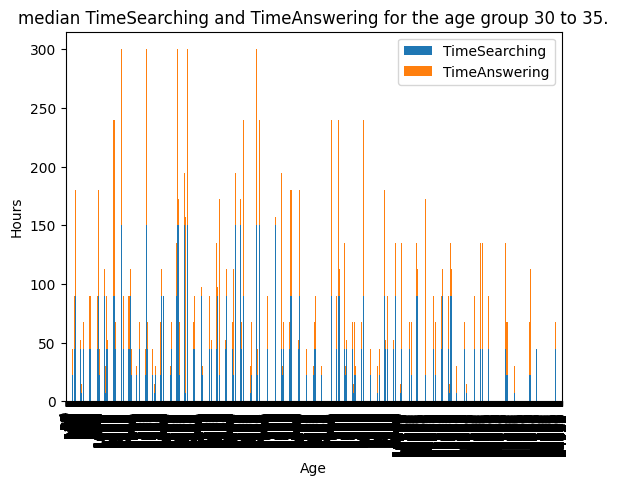

In [36]:
df_tsta.plot(kind='bar', stacked=True)
plt.title('median TimeSearching and TimeAnswering for the age group 30 to 35.')
plt.xlabel('Age')
plt.ylabel('Hours')

conn.close()

In [37]:
# again reading and connectiong to dataset
df = pd.read_csv('survey_data_1.csv')

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)

65437

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [48]:
## Write your code here
q7 = """ SELECT CompTotal, Age FROM main WHERE Age IN ('45-54 years old', '55-64 years old')
"""
df_line = pd.read_sql_query(q7, conn)

df_line = df_line.groupby('Age')['CompTotal'].median().reset_index()
df_line.head()

Age  CompTotal
0  45-54 years old   130000.0
1  55-64 years old   135000.0

<Axes: >

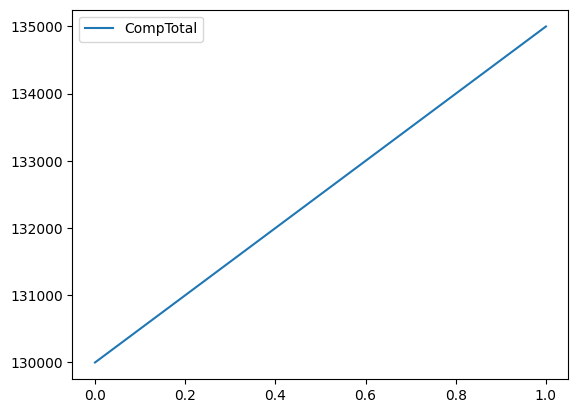

In [49]:
# plot

df_line.plot(kind='line')

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [53]:
## Write your code here
q8 = """ SELECT MainBranch, count(*) as Frequency FROM main GROUP BY MainBranch
"""
df_barh = pd.read_sql_query(q8, conn)
df_barh.head()

MainBranch  Frequency
0                     I am a developer by profession      50207
1                              I am learning to code       3875
2  I am not primarily a developer, but I write co...       6511
3                        I code primarily as a hobby       3334
4  I used to be a developer by profession, but no...       1510

<Axes: ylabel='MainBranch'>

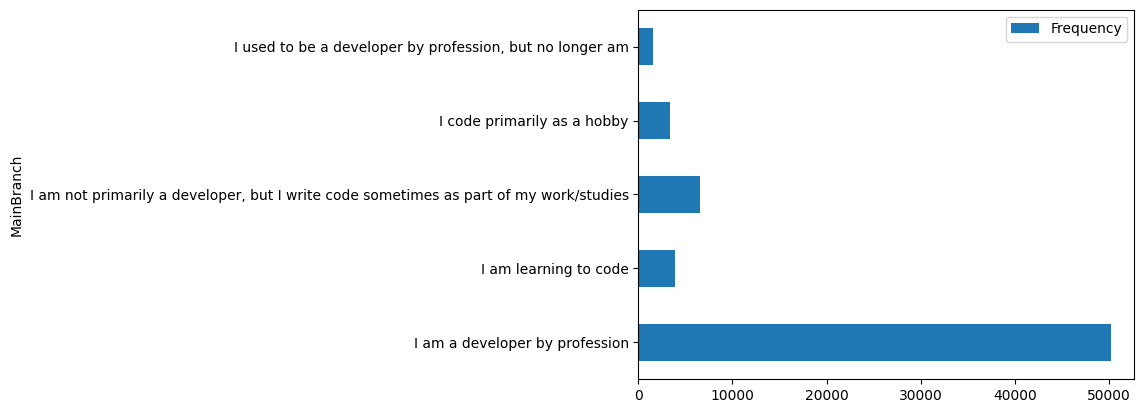

In [56]:
# Plot
df_barh.set_index('MainBranch', inplace=True)
df_barh.plot(kind='barh')


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [57]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
